In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
df = pd.read_csv('../data/data_refined.csv')

In [19]:
print(len(df['timestamp'].unique()))
unique_timestamps = df['timestamp'].unique()

143


In [20]:
floor_id = df['floor_id'].unique()[1]
single_floor_df = df[df['floor_id'] == floor_id]
single_floor_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8513 entries, 1 to 272310
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  8513 non-null   float64
 1   mac        8513 non-null   object 
 2   x          8513 non-null   float64
 3   y          8513 non-null   float64
 4   rssi       8513 non-null   float64
 5   floor_id   8513 non-null   int64  
 6   room_id    7896 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 532.1+ KB


In [21]:
counts = []
current_count = 0
last_timestamp = None

for entry in single_floor_df['timestamp']:

    if last_timestamp != entry:
        last_timestamp = entry
        counts.append(current_count)
        current_count = 1
    else:
        current_count += 1

print(counts)

[0, 8, 22, 43, 44, 51, 57, 52, 61, 53, 61, 66, 66, 70, 67, 74, 78, 81, 83, 96, 86, 81, 87, 85, 91, 88, 107, 107, 98, 92, 86, 88, 70, 77, 76, 75, 56, 66, 54, 61, 61, 62, 57, 60, 61, 70, 56, 54, 53, 70, 54, 54, 59, 63, 64, 69, 75, 74, 73, 92, 62, 67, 75, 65, 75, 69, 91, 69, 78, 74, 90, 71, 76, 77, 83, 87, 87, 92, 64, 83, 79, 74, 91, 72, 75, 71, 91, 71, 77, 46, 82, 80, 61, 73, 68, 72, 78, 67, 68, 56, 61, 64, 70, 52, 45, 56, 46, 48, 56, 44, 47, 44, 38, 44, 41, 42, 35, 28, 31, 35, 38, 27, 36, 24, 27, 25, 30, 22, 27, 28, 18, 20, 16, 21, 22, 20, 21, 17, 19, 17, 20, 20, 20]


In [22]:
unique_timestamps = np.array(unique_timestamps)
diff_between_timestamps = unique_timestamps[1:] - unique_timestamps[:-1]
print(diff_between_timestamps)

[301. 301. 301. 301. 301. 301. 301. 301. 301. 301. 301. 301. 301. 301.
 301. 301. 301. 301. 301. 301. 301. 301. 301. 301. 301. 301. 301. 301.
 301. 301. 301. 301. 301. 301. 301. 301. 301. 301. 301. 301. 301. 301.
 301. 301. 301. 301. 304. 301. 301. 301. 301. 301. 301. 301. 301. 301.
 301. 301. 302. 301. 301. 301. 301. 301. 301. 301. 301. 301. 301. 301.
 301. 301. 301. 301. 301. 301. 301. 301. 301. 301. 301. 301. 301. 301.
 301. 301. 301. 301. 301. 306. 301. 301. 301. 303. 301. 302. 305. 301.
 301. 301. 301. 301. 304. 301. 301. 301. 301. 302. 301. 301. 301. 302.
 303. 301. 301. 301. 301. 301. 301. 301. 301. 301. 306. 302. 301. 301.
 301. 301. 301. 301. 301. 301. 303. 301. 306. 301. 306. 301. 301. 303.
 302. 305.]


In [7]:
print(len(counts))
print(len(unique_timestamps))

143
143


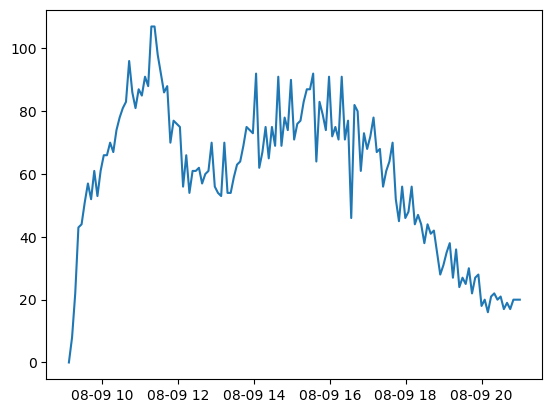

In [9]:
# timestamps to readable format
unique_timestamps = [pd.to_datetime(x, unit='s') for x in unique_timestamps]

plt.plot(unique_timestamps, counts)